# Les allergisants de retour à Paris, à quoi ressemblent-ils ?

#### Préambule

Ce problème reprend en partie les premières questions traitées dans le problème numéro 4 concernant la question des arbres allergisants dans Paris.

#### Fichiers mis à disposition

'arbres_paris.csv' qui liste l'ensemble des arbres suivis par la mairie de Paris.
Il résulte d'un nettoyage de la base de données publiée comme open data par la mairie de Paris.
Chaque ligne de ce fichier est associée à un arbre et on renseigne les variables suivante :

- DOMANIALITE = renseignement sur l'emplacement de l'arbre
- ARRONDISSEMENT = nom de l'arrondissement auquel il appartient
- CIRCONFERENCE_cm = circonférence (en cm)
- HAUTEUR_m = hauteur (en m)
- NOM = espèce
- LAT = latitude
- LON = longitude

#### Objectifs :

Certains arbres provoquent des allergies au pollen. Voici la liste de ces arbres :

- Frêne
- Bouleau 
- Mûrier
- Olivier
- Charme
- Platane
- Noisetier de Byzance
- Cyprès
- Aulne

#### Comment distinguer un arbre allergisant à partir de ses dimensions ?

## Etape 1 : Distinction des arbres allergisants

In [17]:
import pandas as pd

T = pd.read_csv('data/arbres_paris.csv', sep = ';', encoding = 'latin1')

T.head()

,DOMANIALITE,ARRONDISSEMENT,CIRCONFERENCE_cm,HAUTEUR_m,NOM,LAT,LON
0,CIMETIERE,SEINE-SAINT-DENIS,0.0,0.0,Marronnier,48.903017,2.410581
1,CIMETIERE,SEINE-SAINT-DENIS,70.0,8.0,Noisetier de Byzance,48.904429,2.351278
2,DASCO,PARIS 7,35.0,8.0,Bouleau,48.858418,2.299582
3,DASCO,PARIS 20,65.0,7.0,Marronnier,48.850862,2.406973
4,DASCO,PARIS 19,60.0,7.0,Savonnier,48.882507,2.375828


In [18]:
L = ['Frêne', 'Olivier', 'Noisetier de Byzance', 'Bouleau',
     'Charme', 'Cyprès', 'Mûrier', 'Platane', 'Aulne']

In [19]:
def allergisant(nom):
    if nom in L:
        return 1
    else:
        return 0

In [20]:
T['Allergisant'] = T['NOM'].apply(allergisant)

T.head()

,DOMANIALITE,ARRONDISSEMENT,CIRCONFERENCE_cm,HAUTEUR_m,NOM,LAT,LON,Allergisant
0,CIMETIERE,SEINE-SAINT-DENIS,0.0,0.0,Marronnier,48.903017,2.410581,0
1,CIMETIERE,SEINE-SAINT-DENIS,70.0,8.0,Noisetier de Byzance,48.904429,2.351278,1
2,DASCO,PARIS 7,35.0,8.0,Bouleau,48.858418,2.299582,1
3,DASCO,PARIS 20,65.0,7.0,Marronnier,48.850862,2.406973,0
4,DASCO,PARIS 19,60.0,7.0,Savonnier,48.882507,2.375828,0


On voit que sur les 5 premiers arbres, 2 sont allergisants

## Etape 2 : Régression de la hauteur par rapport à la circonférence

#### Sélection de données

On voit que le 1er arbre n'a même pas poussé car les dimensions sont nulles.

In [21]:
T = T.query('0< CIRCONFERENCE_cm < 3000 and 0< HAUTEUR_m < 20')

#On remplace T par une table ne contenant que des arbres de dimensions non nulles et n'excédant 
# pas 20m de haut et 3m de circonference

In [22]:
R = T.groupby(['Allergisant', 'ARRONDISSEMENT']).mean()
R = R.reset_index()
R

,Allergisant,ARRONDISSEMENT,CIRCONFERENCE_cm,HAUTEUR_m,LAT,LON
0,0,HAUTS-DE-SEINE,104.680000,10.296842,48.827810,2.295838
1,0,PARIS 1,77.392182,7.472888,48.861108,2.341337
2,0,PARIS 10,72.625239,9.055449,48.875784,2.361031
3,0,PARIS 11,74.882765,8.919510,48.859577,2.382265
4,0,PARIS 12,80.671901,8.848181,48.837622,2.415460
5,0,PARIS 13,77.561666,8.623236,48.826353,2.359151
6,0,PARIS 14,90.352855,8.396624,48.830587,2.326711
7,0,PARIS 15,78.983435,8.771954,48.839555,2.293778
8,0,PARIS 16,83.809326,9.626299,48.858837,2.269709
9,0,PARIS 17,84.254761,8.661512,48.888607,2.307649


In [23]:
import pylab as pl
pl.style.use('bmh')
import seaborn as sns

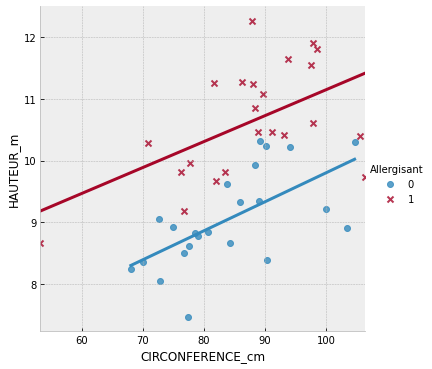

In [25]:
sns.lmplot(data = R,
           x = 'CIRCONFERENCE_cm',
           y = 'HAUTEUR_m',
           hue = 'Allergisant',
           ci = None,
           markers = ['o', 'x'])

#### Pour une même circonférence, la hauteur d'un arbre allergisant sera supérieure à celle d'un arbre non allergisant

#### Pour une même hauteur, la circonférence d'un arbre allergisant sera inférieure à celle d'un arbre non allergisant

Un arbre allergisant est donc plus grand et plus fin qu'un arbre non allergisant

## Etape 3 : Pertinence du modèle

In [26]:
from scipy.stats import linregress

In [28]:
A = R.query('Allergisant == 1')
G = R.query('Allergisant == 0')

#### Allergisant

In [32]:
X, Y = A['CIRCONFERENCE_cm'], A['HAUTEUR_m']
a, b, r = linregress(X, Y)[:3]
a, b, r

(0.042000671882077734, 6.947159495336404, 0.5386843666064173)

L'équation de droite de la régression est y = 0,04x + 6,95 avec un coefficient de regression de 0,54
Le modèle est donc acceptable

#### Non allergisant

In [33]:
X, Y = G['CIRCONFERENCE_cm'], G['HAUTEUR_m']
a, b, r = linregress(X, Y)[:3]
a, b, r

(0.04695648839926367, 5.105745496305197, 0.6214311963318919)

L'équation de droite de la régression est y = 0,05x + 5,10 avec un coefficient de regression de 0,62
Le modèle est donc convenable